In [17]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torchvision.models import resnet18
from torch.nn import functional as F

In [2]:
dataset = ImageFolder("./data/images_train/",
                       v2.Compose([v2.PILToTensor(), v2.ToDtype(torch.float32, scale=True)]))

In [3]:
len(dataset.classes)

176

In [4]:
dataloader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=8)

In [5]:
images, labels = next(iter(dataloader))

In [6]:
images.shape, labels.shape

(torch.Size([256, 3, 224, 224]), torch.Size([256]))

In [41]:
images[1].shape, labels[1]

(torch.Size([3, 224, 224]), tensor(110))

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
label_map = {v: k for k, v in dataset.class_to_idx.items()}

In [50]:
label_map[int(labels[1])]

'pinus_peucea'

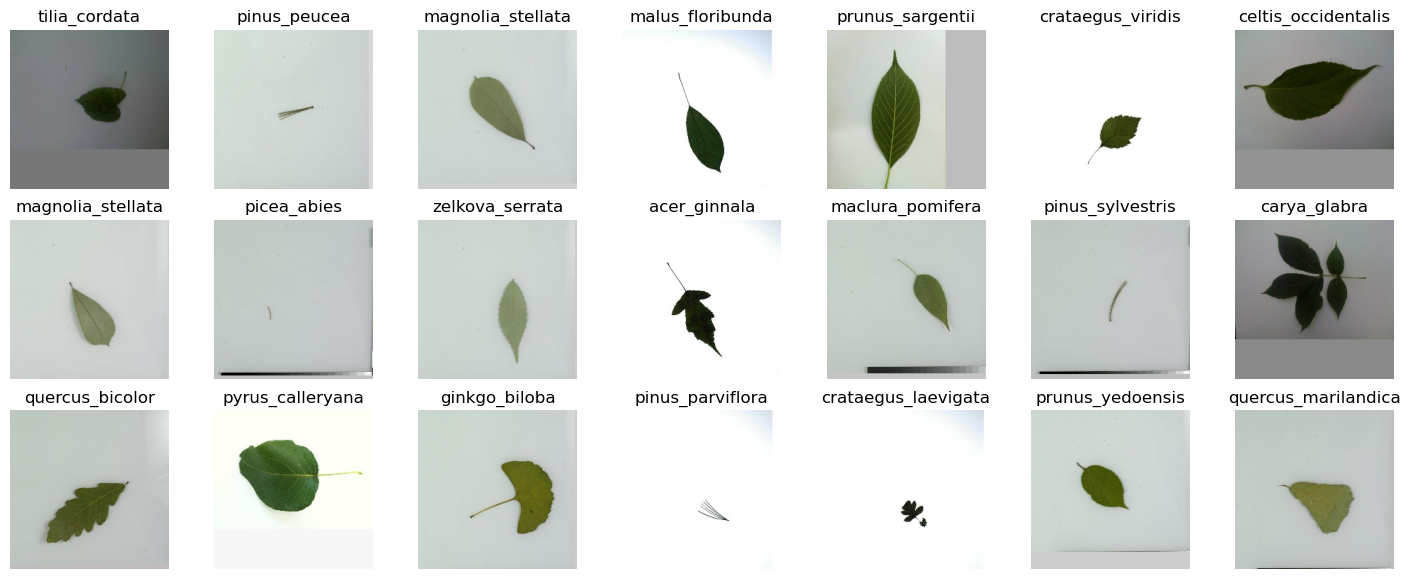

In [71]:
rows, cols = 3, 7
fig, axes = plt.subplots(rows, cols, figsize=(rows*6, cols))
axes = axes.flatten()
for i in range(rows * cols):
    axes[i].imshow(v2.ToPILImage()(images[i]))
    axes[i].axis('off')
    axes[i].set_title(label_map[int(labels[i])])
plt.show()

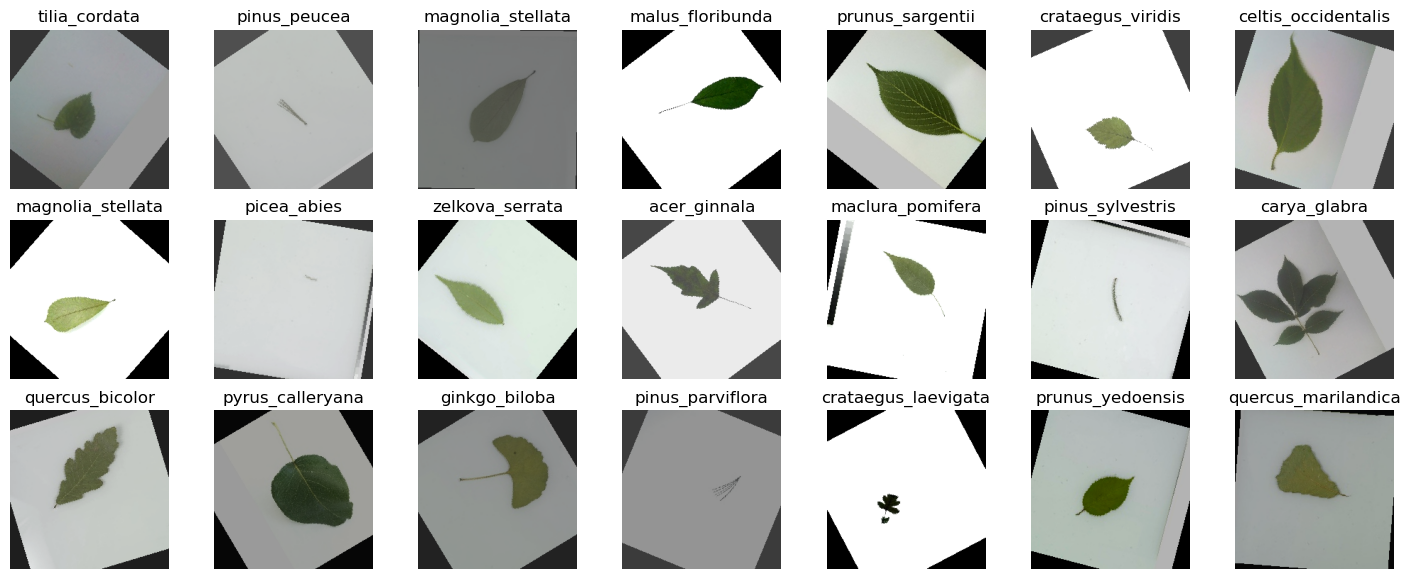

In [83]:
aug = v2.Compose([
    v2.RandomHorizontalFlip(),
    v2.RandomVerticalFlip(),
    v2.RandomRotation(90),
    v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5)
])

rows, cols = 3, 7
fig, axes = plt.subplots(rows, cols, figsize=(rows*6, cols))
axes = axes.flatten()
for i in range(rows * cols):
    axes[i].imshow(aug(v2.ToPILImage()(images[i])))
    axes[i].axis('off')
    axes[i].set_title(label_map[int(labels[i])])
plt.show()

In [11]:
net = resnet18()
net.fc = nn.LazyLinear(176)

/usr/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [15]:
preds = net(images)

In [18]:
F.cross_entropy(preds, labels)

tensor(5.3163, grad_fn=<NllLossBackward0>)